In [1]:
# Importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

# Load & Explore Data

In [86]:
# Loading datasets
df = pd.read_csv(r"C:\Users\YY\Desktop\train.csv")
holidays = pd.read_csv(r"C:\Users\YY\Desktop\holidays_events.csv")

In [87]:
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [90]:
# Taking a subset of the dataset because it's too big for the analysis and takes so much time
sample_df = df.sample(10000, random_state = 42) # taking 100k rows instead of 3 Millions

In [92]:
# checking
sample_df.head(10)

,id,date,store_nbr,family,sales,onpromotion
2483653,2483653,2016-10-28,46,CLEANING,2576.000,61
2761877,2761877,2017-04-03,52,DAIRY,0.000,0
1217988,1217988,2014-11-16,33,MEATS,357.354,2
1231938,1231938,2014-11-24,25,HOME AND KITCHEN I,5.000,0
528175,528175,2013-10-24,29,EGGS,0.000,0
1556448,1556448,2015-05-26,30,BEVERAGES,1252.000,0
1307554,1307554,2015-01-06,46,POULTRY,1052.111,2
1063711,1063711,2014-08-21,54,"LIQUOR,WINE,BEER",20.000,0
25515,25515,2013-01-15,25,CELEBRATION,0.000,0
2267762,2267762,2016-06-29,39,BEAUTY,7.000,0


In [94]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2483653 to 735198
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  int64  
 1   date         10000 non-null  object 
 2   store_nbr    10000 non-null  int64  
 3   family       10000 non-null  object 
 4   sales        10000 non-null  float64
 5   onpromotion  10000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 546.9+ KB


In [96]:
# Dropping the "id" column since it's not necessary for analysis
sample_df = sample_df.drop( columns = 'id')
sample_df

,date,store_nbr,family,sales,onpromotion
2483653,2016-10-28,46,CLEANING,2576.000,61
2761877,2017-04-03,52,DAIRY,0.000,0
1217988,2014-11-16,33,MEATS,357.354,2
1231938,2014-11-24,25,HOME AND KITCHEN I,5.000,0
528175,2013-10-24,29,EGGS,0.000,0
...,...,...,...,...,...
986519,2014-07-09,39,HOME APPLIANCES,0.000,0
2302765,2016-07-19,20,PERSONAL CARE,214.000,6
2143730,2016-04-20,9,HOME APPLIANCES,0.000,0
2287895,2016-07-10,53,BREAD/BAKERY,1169.458,12


In [98]:
# Converting "date" column from object (string data type) to datetime data type
sample_df['date'] = pd.to_datetime(sample_df['date'])

In [100]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2483653 to 735198
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         10000 non-null  datetime64[ns]
 1   store_nbr    10000 non-null  int64         
 2   family       10000 non-null  object        
 3   sales        10000 non-null  float64       
 4   onpromotion  10000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 468.8+ KB


In [102]:
# Seeing if there's any null values
sample_df.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

# Feature Engineering

In [105]:
# Extract time features
# Extract the day number from the 'date' column and store it in a new column 'day'
sample_df['day'] = sample_df['date'].dt.day

In [107]:
# Extract the day of the week from the 'date' column 
sample_df['day_week'] = sample_df['date'].dt.dayofweek

In [109]:
# Extract the month number from the 'date' column and store it in a new column 'month'
sample_df['month'] = sample_df['date'].dt.month

In [111]:
# Extract the year number from the 'date' column and store it in a new column 'year'
sample_df['year'] = sample_df['date'].dt.year

In [113]:
# Checking
sample_df.head(5)

,date,store_nbr,family,sales,onpromotion,day,day_week,month,year
2483653,2016-10-28,46,CLEANING,2576.000,61,28,4,10,2016
2761877,2017-04-03,52,DAIRY,0.000,0,3,0,4,2017
1217988,2014-11-16,33,MEATS,357.354,2,16,6,11,2014
1231938,2014-11-24,25,HOME AND KITCHEN I,5.000,0,24,0,11,2014
528175,2013-10-24,29,EGGS,0.000,0,24,3,10,2013


In [115]:
# Add polynomial trend (e.g., date index squared)
sample_df['time_index'] = (sample_df['date'] - sample_df['date'].min()).dt.days
sample_df['time_index_sq'] = sample_df['time_index']**2
sample_df

,date,store_nbr,family,sales,onpromotion,day,day_week,month,year,time_index,time_index_sq
2483653,2016-10-28,46,CLEANING,2576.000,61,28,4,10,2016,1396,1948816
2761877,2017-04-03,52,DAIRY,0.000,0,3,0,4,2017,1553,2411809
1217988,2014-11-16,33,MEATS,357.354,2,16,6,11,2014,684,467856
1231938,2014-11-24,25,HOME AND KITCHEN I,5.000,0,24,0,11,2014,692,478864
528175,2013-10-24,29,EGGS,0.000,0,24,3,10,2013,296,87616
...,...,...,...,...,...,...,...,...,...,...,...
986519,2014-07-09,39,HOME APPLIANCES,0.000,0,9,2,7,2014,554,306916
2302765,2016-07-19,20,PERSONAL CARE,214.000,6,19,1,7,2016,1295,1677025
2143730,2016-04-20,9,HOME APPLIANCES,0.000,0,20,2,4,2016,1205,1452025
2287895,2016-07-10,53,BREAD/BAKERY,1169.458,12,10,6,7,2016,1286,1653796


In [117]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [119]:
# Converting "date" column from object (string data type) to datetime data type
holidays['date'] = pd.to_datetime(holidays['date'])

In [121]:
holidays['is_holiday'] = 1

In [123]:
# Merge the holidays dataset into the sales dataframe
sample_df = sample_df.merge(holidays[['date','is_holiday']], on='date', how='left')
sample_df

,date,store_nbr,family,sales,onpromotion,day,day_week,month,year,time_index,time_index_sq,is_holiday
0,2016-10-28,46,CLEANING,2576.000,61,28,4,10,2016,1396,1948816,NaN
1,2017-04-03,52,DAIRY,0.000,0,3,0,4,2017,1553,2411809,NaN
2,2014-11-16,33,MEATS,357.354,2,16,6,11,2014,684,467856,NaN
3,2014-11-24,25,HOME AND KITCHEN I,5.000,0,24,0,11,2014,692,478864,NaN
4,2013-10-24,29,EGGS,0.000,0,24,3,10,2013,296,87616,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10201,2014-07-09,39,HOME APPLIANCES,0.000,0,9,2,7,2014,554,306916,1.0
10202,2016-07-19,20,PERSONAL CARE,214.000,6,19,1,7,2016,1295,1677025,NaN
10203,2016-04-20,9,HOME APPLIANCES,0.000,0,20,2,4,2016,1205,1452025,1.0
10204,2016-07-10,53,BREAD/BAKERY,1169.458,12,10,6,7,2016,1286,1653796,NaN


In [125]:
# Replace missing values (NaN) in the 'is_holiday' column with 0
sample_df['is_holiday'] = sample_df['is_holiday'].fillna(0)

# Prepare Train/Test Split

In [128]:
# Time-based split
train = sample_df[sample_df['date'] < "2016-01-01"]
test = sample_df[sample_df['date'] >= "2016-01-01"]

In [130]:
x_train = train[['time_index','time_index_sq','month','day_week','is_holiday']]
y_train = train['sales']

In [132]:
x_test = test[['time_index','time_index_sq','month','day_week','is_holiday']]
y_test = test['sales']

In [134]:
# Convert categorical features (month, day_week) into dummies
x_train = pd.get_dummies(x_train, columns=['month','day_week'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['month','day_week'], drop_first=True)

In [136]:
x_test = x_test.reindex(columns = x_train.columns, fill_value=0)

In [138]:
x_test

,time_index,time_index_sq,is_holiday,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_week_1,day_week_2,day_week_3,day_week_4,day_week_5,day_week_6
0,1396,1948816,0.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
1,1553,2411809,0.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,1275,1625625,0.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
16,1541,2374681,0.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
17,1282,1643524,0.0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10197,1326,1758276,0.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
10200,1201,1442401,1.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
10202,1295,1677025,0.0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
10203,1205,1452025,1.0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


# Train Models

In [158]:
# Baseline Linear Regression
baseline_model = LinearRegression()
baseline_model.fit(train[['time_index']], y_train)

LinearRegression()

In [160]:
y_pred_baseline = baseline_model.predict(test[['time_index']])
baseline_rmse = root_mean_squared_error(y_test, y_pred_baseline)
print("Baseline RMSE:", baseline_rmse)

Baseline RMSE: 1317.544440196105


In [162]:
# Trend + Seasonality Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [164]:
y_pred = model.predict(x_test)
rmse = root_mean_squared_error(y_test, y_pred)
print("Trend + Seasonality RMSE:", rmse)

Trend + Seasonality RMSE: 1322.4280296663817


# Visualization

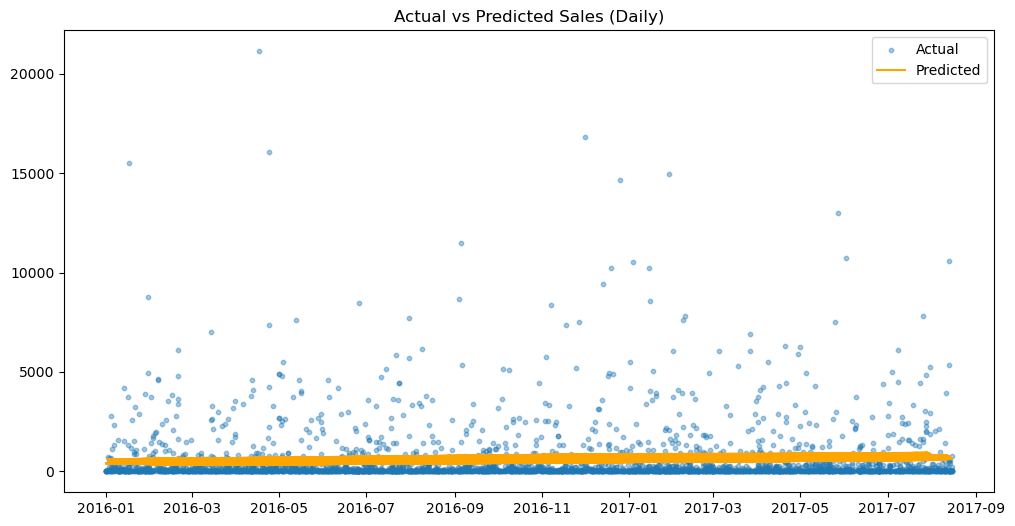

In [175]:
plt.figure(figsize=(12,6))

# Scatter plot of actual sales values
plt.scatter(test['date'], y_test, label="Actual", alpha=0.4, s=10)
plt.plot(test['date'], y_pred, label="Predicted", color="orange")
plt.title("Actual vs Predicted Sales (Daily)")
plt.legend()
plt.show()

In [177]:
plot_df = test.copy()
plot_df['y_pred'] = y_pred
plot_df['y_pred_baseline'] = y_pred_baseline

In [179]:
plot_monthly = plot_df.resample('ME', on='date').agg({
    'sales':'mean',
    'y_pred':'mean',
    'y_pred_baseline':'mean'
})

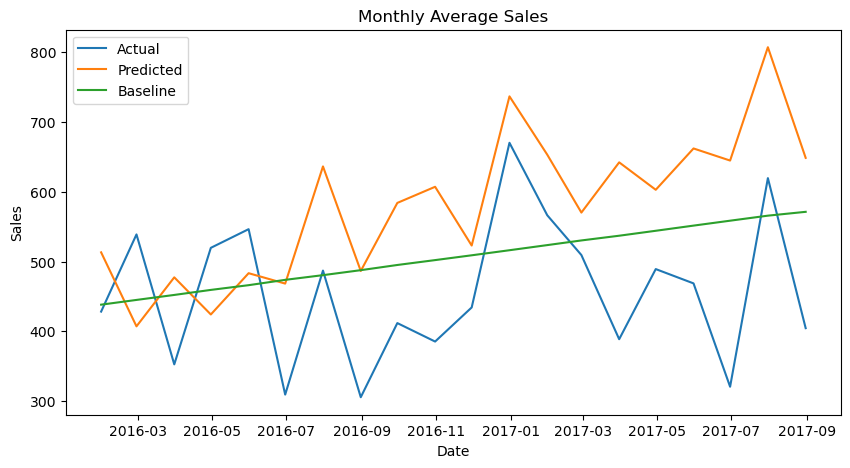

In [181]:
plt.figure(figsize=(10,5))
# Actual sales
plt.plot(plot_monthly.index, plot_monthly['sales'], label="Actual")

# Predicted sales
plt.plot(plot_monthly.index, plot_monthly['y_pred'], label="Predicted")

# Baseline
plt.plot(plot_monthly.index, plot_monthly['y_pred_baseline'], label="Baseline")
plt.title("Monthly Average Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()